In [1]:
pip install atomgrad==0.2.5

In [2]:
from atomgrad.atom import Atom
from atomgrad.nn import AtomNet, Layer
from atomgrad.metrics import binary_cross_entropy, accuracy_val
from atomgrad.optim import SGD

7.0
2.0


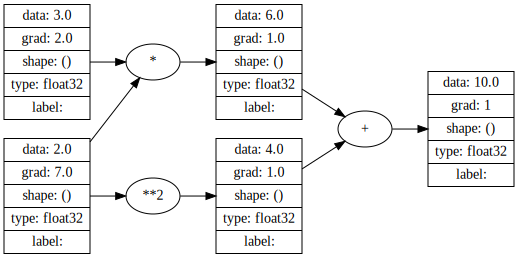

In [3]:
from atomgrad.atom import Atom
from atomgrad.graph import draw_dot

# create two tensors with gradients enabled
x = Atom(2.0, requires_grad=True)
y = Atom(3.0, requires_grad=True)

# define a function
z = x * y + x ** 2

# compute the backward pass
z.backward()

# print the gradients
print(x.grad) # 7.0
print(y.grad) # 2.0

draw_dot(z)

In [4]:
x = [
    [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
  [0.0, 4.0, 0.5],
  [3.0, -1.0, 0.5]]
y = [1, 1, 0, 1, 0, 1]

x = Atom(x)
y = Atom(y)

In [5]:
n = 16
model = AtomNet(layers=[
    Layer(3, n, activation="tanh"),
    Layer(n, n, activation="tanh"),
    Layer(n , 1, activation="sigmoid")
])
optimizer = SGD(model.params(), lr=0.05)

In [6]:
model.fit(x, y, optimizer, binary_cross_entropy, accuracy_val, epochs=50)

0 loss 2.6717467308044434, accuracy 100.0%
10 loss 0.24083305895328522, accuracy 100.0%
20 loss 0.1369265764951706, accuracy 100.0%
30 loss 0.09281135350465775, accuracy 100.0%
40 loss 0.07360291481018066, accuracy 100.0%


In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

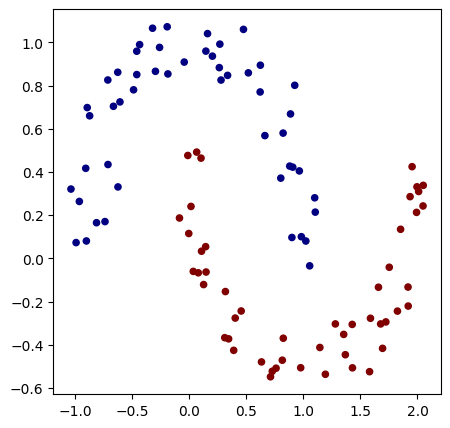

In [8]:
from sklearn.datasets import make_moons, make_blobs
X, Y = make_moons(n_samples=100, noise=0.1)

y_norm = Y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y_norm, s=20, cmap='jet')

X = Atom(X)
Y = Atom(Y)

In [9]:
model2 = AtomNet(layers=[
    Layer(2, 16, activation="tanh"),
    Layer(16, 16, activation="tanh"),
    Layer(16, 1, activation="sigmoid")
])
optimizer2 = SGD(model2.params(), lr=0.01)

After two 200 epochs training runs

In [12]:
model2.fit(X, Y, optimizer2, binary_cross_entropy, accuracy_val, epochs=200)

0 loss 1.1059958934783936, accuracy 100.0%
10 loss 1.0356979370117188, accuracy 100.0%
20 loss 0.969876766204834, accuracy 100.0%
30 loss 0.9440363049507141, accuracy 100.0%
40 loss 0.8982403874397278, accuracy 100.0%
50 loss 0.8072019219398499, accuracy 100.0%
60 loss 0.7475721836090088, accuracy 100.0%
70 loss 0.7058700323104858, accuracy 100.0%
80 loss 0.657598614692688, accuracy 100.0%
90 loss 0.6460387706756592, accuracy 100.0%
100 loss 0.7520403265953064, accuracy 100.0%
110 loss 0.638593316078186, accuracy 100.0%
120 loss 0.5565192103385925, accuracy 100.0%
130 loss 0.5503408312797546, accuracy 100.0%
140 loss 0.521675169467926, accuracy 100.0%
150 loss 0.5044970512390137, accuracy 100.0%
160 loss 0.5210475921630859, accuracy 100.0%
170 loss 0.5162321329116821, accuracy 100.0%
180 loss 0.4572426378726959, accuracy 100.0%
190 loss 0.4159974455833435, accuracy 100.0%


In [18]:
pred = model2.predict(X[40])
pred, Y[40]

(Atom(data=[[0.00127943]], requires_grad=True, dtype=float32),
 Atom(data=0.0, requires_grad=True, dtype=float32))